<a href="https://colab.research.google.com/github/manekgnath/Machine-Learning/blob/main/ML_project_9_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/car.data",header = None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df['buying'].value_counts()

,count
buying,
vhigh,432
high,432
med,432
low,432


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
y = df['class']
x = df.drop(['class'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5000)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)


0.9884393063583815

In [ ]:
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)*100


,0
safety,28.136529
persons,23.123227
buying,18.923415
maint,15.100571
lug_boot,8.228280
doors,6.487978


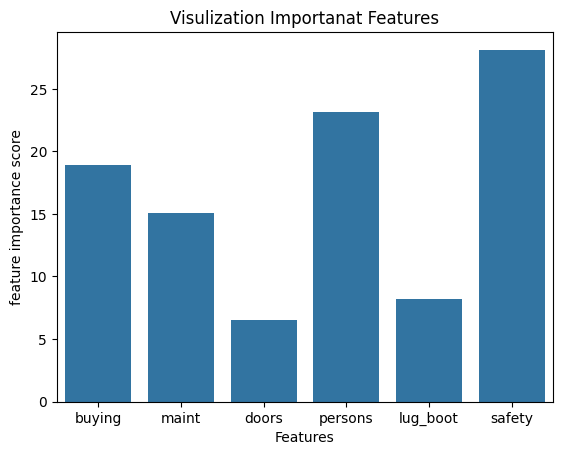

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=x.columns,y=model.feature_importances_*100)
plt.xlabel('Features')
plt.ylabel('feature importance score')
plt.title('Visulization Importanat Features')
plt.show()



In [ ]:
z = x.drop(['doors'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
z_train,z_test,y_train,y_test = train_test_split(z,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(z_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = model.predict(z_test)

In [ ]:
from sklearn.metrics import top_k_accuracy_score
accuracy_score(y_test,y_pred)

0.9566473988439307

In [ ]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(z_train,y_train)



RandomForestClassifier(n_estimators=200)